In [22]:
!pip install deepface

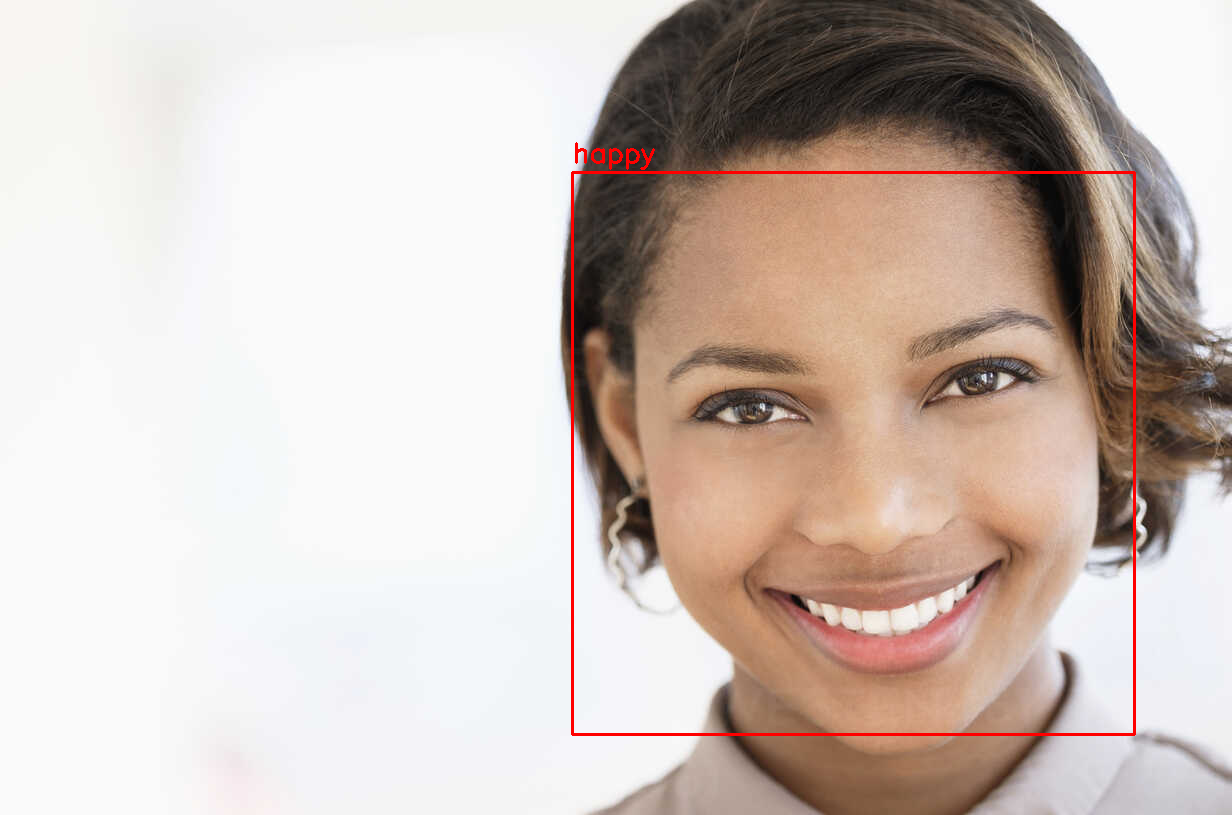

In [23]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
image_path = "/content/smiling.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert grayscale image to RGB format
rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    # Extract the face ROI (Region of Interest)
    face_roi = rgb_image[y:y + h, x:x + w]

    # Perform emotion analysis on the face ROI
    result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False)

    # Determine the dominant emotion
    emotion = result[0]['dominant_emotion']

    # Draw rectangle around face and label with predicted emotion
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Display the resulting image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
